In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv("D:\Assignments\Flexiple\Womens Clothing E-Commerce Reviews.csv")

Data Exploration & Data Cleaning

In [3]:
data.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.head(2)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [6]:
data.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [7]:
data.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
data=data.dropna()

In [9]:
data.shape

(19662, 10)

In [10]:
data[data.duplicated()] #There are no duplicates in the dataset

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name


In [11]:
data.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

# Statistical Analysis:

- What is the average age of the reviewers? How does this vary across different clothing departments?
- Analyze the distribution of 'Rating'. What is the most common rating given by customers?

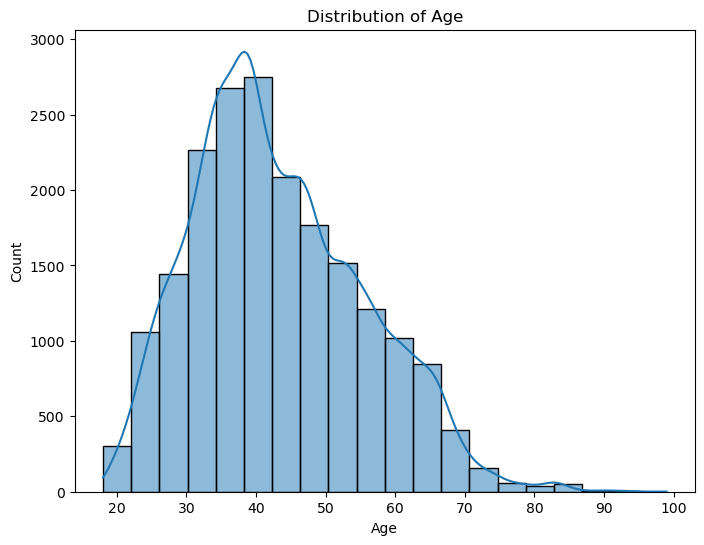

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

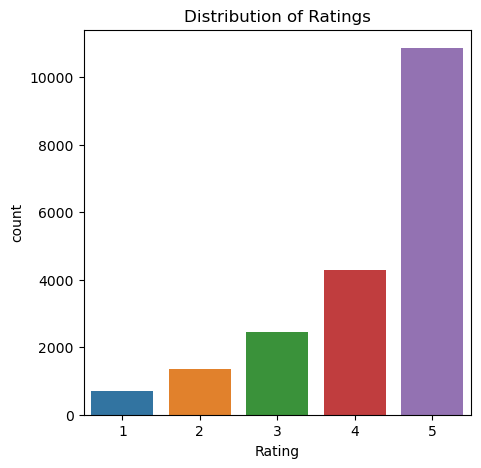

In [15]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.show()

In [16]:
rating_distribution = data['Rating'].value_counts()
rating_distribution

5    10858
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

In [17]:
most_common_rating = rating_distribution.idxmax()
most_common_rating

5

Text Analysis:

- For reviews with a rating of 5, what are the most frequently used words in the 'Review Text'?
- Perform sentiment analysis on the 'Review Text'. How does sentiment correlate with the 'Rating'?

# Correlation and Trends:

- Is there a correlation between 'Positive Feedback Count' and 'Rating'?
- Analyze the trend in the average 'Rating' over different 'Department Names'. Which department has the highest average rating?

In [22]:
correlation_positive_feedback = data['Positive Feedback Count'].corr(data['Rating'])
correlation_positive_feedback

-0.05665872484413004

In [23]:
# Trend in the average 'Rating' over different 'Department Names'
average_rating_by_department = data.groupby('Department Name')['Rating'].mean().sort_values(ascending=False)
average_rating_by_department

Department Name
Bottoms     4.287688
Jackets     4.270762
Intimate    4.257812
Tops        4.156433
Dresses     4.137032
Trend       3.859813
Name: Rating, dtype: float64

In [24]:
max_rated_dpt = average_rating_by_department.idxmax()
max_rated_dpt

'Bottoms'

Text(0, 0.5, 'Average Rating')

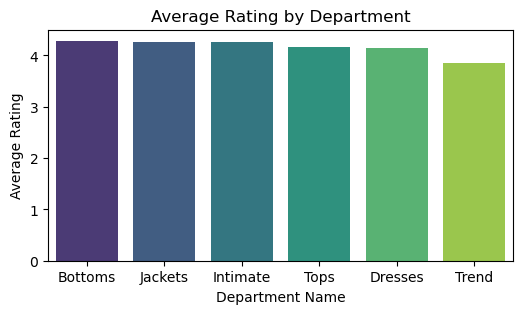

In [30]:
plt.figure(figsize=(6, 3))
sns.barplot(x=average_rating_by_department.index, y=average_rating_by_department.values, palette='viridis')
plt.title('Average Rating by Department')
plt.xlabel('Department Name')
plt.ylabel('Average Rating')

# Categorical Data Analysis:

- Compare the number of reviews in each 'Class Name'. Which class has the most reviews?
- How does the recommendation rate (percentage of reviews where 'Recommended IND' is 1) vary across different 'Division Names'?

In [31]:
reviews_by_class = data['Class Name'].value_counts()
print(reviews_by_class)

Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Lounge             574
Swim               293
Outerwear          281
Shorts             260
Sleep              174
Legwear            131
Intimates          120
Layering           115
Trend              107
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64


In [33]:
most_reviewed_class = reviews_by_class.idxmax()
most_reviewed_class

'Dresses'

In [37]:
# 2. Recommendation rate across different 'Division Names'
recommendation_rate = data.groupby('Division Name')['Recommended IND'].mean() * 100
recommendation_rate = recommendation_rate.sort_values(ascending=False)
recommendation_rate

Division Name
Initmates         84.754098
General Petite    82.074358
General           81.361454
Name: Recommended IND, dtype: float64

Text(0, 0.5, 'Recommendation Rate (%)')

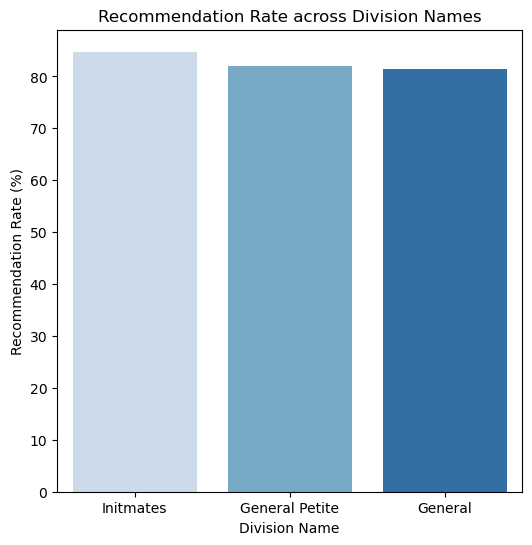

In [40]:

plt.figure(figsize=(6, 6))
sns.barplot(x=recommendation_rate.index, y=recommendation_rate.values, palette='Blues', order=recommendation_rate.index)
plt.title('Recommendation Rate across Division Names')
plt.xlabel('Division Name')
plt.ylabel('Recommendation Rate (%)')
